In [1]:
%matplotlib inline

import pandas as pd
import glob
import seaborn as sns
import sys, os, argparse
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
import os
import clustering as clst
import warnings
warnings.filterwarnings("ignore",category=mpl.cbook.mplDeprecation)

### Set up seaborn appearence
mpl.rc('text', usetex = True)
sns.set_context("notebook", font_scale=1.5)
colors= [ "#d1fffc", "#00ada4", "#edc9ff", "#ae00ff", "#ffc18c", "#d66300"]
sns.set_palette(colors)
pc_map = {'mS':0, 'pS': 1, 'mM': 2, 'pM': 3, 'mR': 4, 'pR': 5}

In [2]:
df = pd.read_csv("result.tsv", sep="\t")

In [3]:
# g = sns.factorplot(data=df, x="method", y="precision", 
#                    row="m", 
#                    col="p", kind="box",
#                    legend_out=True, sharex=True, sharey=True)
# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(30)
# plt.savefig("precision.pdf")

In [5]:
def boxplots_square(results, filename, t, xlb, step):
    for i,v in enumerate(['mS', 'pS', 'pM', 'pR']):
        r = results[results['p'] == v]

        plt.subplot(2,2,i+1)

        clr = sns.color_palette()[pc_map[v]]
        sns.boxplot(data = r,  x = t, y = 'method', 
                    order=['MACHINA', 'PhyloWGS', 'PyClone', 'Clomial', 'SciClone'],
                    showfliers=False, palette=[clr, clr, clr, clr])
        sns.stripplot(data = r, jitter=0.15, x = t, y = 'method', 
                      order=['MACHINA', 'PhyloWGS', 'PyClone', 'Clomial', 'SciClone'],
                      color=".3", alpha=0.6)
        plt.gcf().set_size_inches(10, 7)
        plt.ylabel("")#v, rotation=0, size=25, labelpad=30)
        #plt.title(v)
        plt.xlim((xlb,1.1))
        plt.xticks(np.arange(xlb, 1.1, step))
        if i in [1,3]:
            plt.yticks([],[])
        if i in [2,3]:
            plt.xlabel(t)
        else: 
            plt.xlabel("")

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

In [6]:
df2 = df
df2['method'].replace(['pyclone_org_binomial','ancestree','sciclone','phylowgs','clomial'], 
                      ['PyClone','MACHINA','SciClone','PhyloWGS','Clomial'], inplace=True)

df2.replace({'p': {'S': 'pS', 'M' : 'pM', 'R' : 'pR'}}, inplace=True)

boxplots_square(df2[df2['m'] == 'm5'], 'precision_m5.pdf', 'precision', 0, 0.2)
boxplots_square(df2[df2['m'] == 'm8'], 'precision_m8.pdf', 'precision', 0, 0.2)
boxplots_square(df2[df2['m'] == 'm5'], 'RI_m5.pdf', 'RI', 0.6, 0.1)
boxplots_square(df2[df2['m'] == 'm8'], 'RI_m8.pdf', 'RI', 0.6, 0.1)

# sns.factorplot(data=df, x="method", y="precision", 
#                    row="m", x_order=['MACHINA', 'PhyloWGS', 'PyClone', 'clomial', 'sciClone'],
#                    col="p", kind="strip",
#                    legend_out=True, sharex=True, sharey=True)
# g = sns.factorplot(data=df, x="method", y="precision", 
#                    row="m", x_order=['MACHINA', 'PhyloWGS', 'PyClone', 'clomial', 'sciClone'],
#                    col="p", kind="box",
#                    legend_out=True, sharex=True, sharey=True)
# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(30)
# plt.savefig("precision.pdf")

In [7]:
def boxplots_row(results, filename, t, label_t, xlb, step):
    for i,v in enumerate(['mS', 'pS', 'pM', 'pR']):
        r = results[results['p'] == v]

        plt.subplot(1,4,i+1)

        clr = sns.color_palette()[pc_map[v]]
        sns.boxplot(data = r,  x = t, y = 'method', 
                    order=['MACHINA', 'PhyloWGS', 'PyClone', 'Clomial', 'SciClone'],
                    showfliers=False, palette=[clr, clr, clr, clr])
        sns.stripplot(data = r, jitter=0.15, x = t, y = 'method', 
                      order=['MACHINA', 'PhyloWGS', 'PyClone', 'Clomial', 'SciClone'],
                      color=".3", alpha=0.6)
        plt.gcf().set_size_inches(10, 3)
        plt.ylabel("")#v, rotation=0, size=25, labelpad=30)
        #plt.title(v)
        plt.xlim((xlb,1.1))
        plt.xticks(np.arange(xlb, 1.1, step))
        if i != 0:
            plt.yticks([],[])
        plt.xlabel(label_t)

    plt.tight_layout()
    plt.savefig(filename)
#     plt.close()

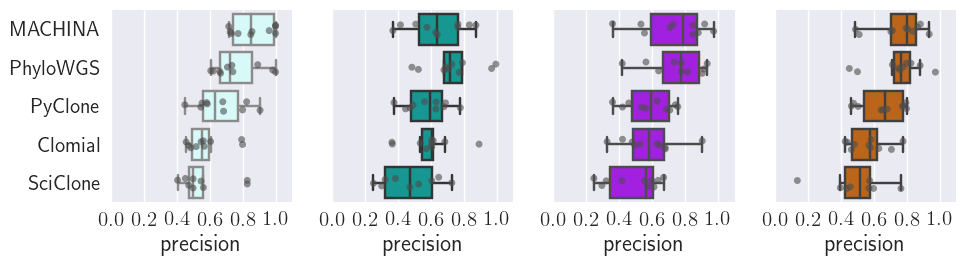

In [8]:
df2 = df
df2['method'].replace(['pyclone_org_binomial','ancestree','sciclone','phylowgs','clomial'], 
                      ['PyClone','MACHINA','SciClone','PhyloWGS','Clomial'], inplace=True)

df2.replace({'p': {'S': 'pS', 'M' : 'pM', 'R' : 'pR'}}, inplace=True)

boxplots_row(df2[df2['m'] == 'm5'], 'precision_m5_row.pdf', 'precision',  'precision', 0, 0.2)

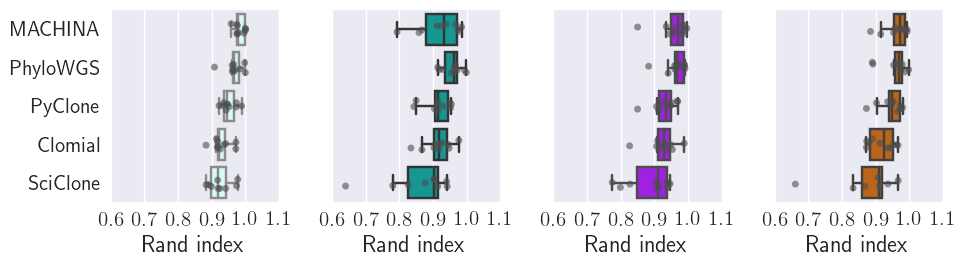

In [9]:
boxplots_row(df2[df2['m'] == 'm5'], 'RI_m5_row.pdf', 'RI', 'Rand index', 0.6, 0.1)

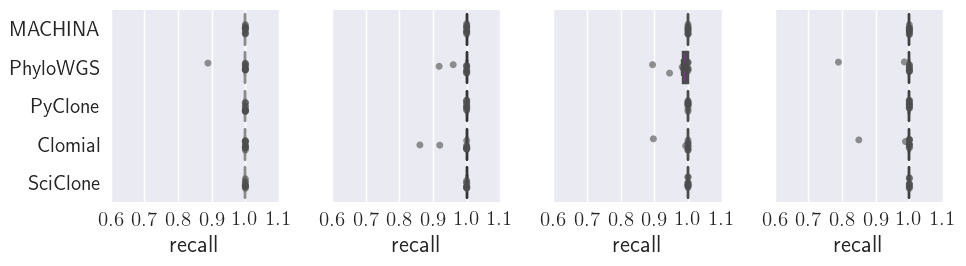

In [10]:
boxplots_row(df2[df2['m'] == 'm5'], 'recall_m5_row.pdf', 'recall', 'recall', 0.6, 0.1)

## Confidence interval widths

In [11]:
df_width = pd.read_csv("../machina/interval_width_m5.tsv", sep="\t")
df_width['method'].replace(['pyclone','ancestree','sciclone','phylowgs','clomial'], 
                           ['PyClone','MACHINA','SciClone','PhyloWGS','Clomial'], inplace=True)

df_width.replace({'pattern': {'S': 'pS', 'M' : 'pM', 'R' : 'pR'}}, inplace=True)

In [12]:
df_width_mean = df_width.groupby(["method", "pattern", "instance"])['width'].mean().to_frame('width').reset_index(['method','pattern', 'instance'])

In [18]:
def boxplots_row_width(results, filename, t, label_t, xlb, xub, step):
    for i,v in enumerate(['mS', 'pS', 'pM', 'pR']):
        r = results[results['pattern'] == v]

        plt.subplot(1,4,i+1)

        clr = sns.color_palette()[pc_map[v]]
        sns.boxplot(data = r,  x = t, y = 'method', 
                       order=['MACHINA', 'PhyloWGS', 'PyClone', 'Clomial', 'SciClone'],
                       palette=[clr, clr, clr, clr], showfliers=False)
        sns.stripplot(data = r, jitter=0.15, x = t, y = 'method', 
                      order=['MACHINA', 'PhyloWGS', 'PyClone', 'Clomial', 'SciClone'],
                      color=".3", alpha=0.6)
        plt.gcf().set_size_inches(10, 3)
        plt.ylabel("")#v, rotation=0, size=25, labelpad=30)
        #plt.title(v)
        plt.xlim((xlb,xub))
        plt.xticks(np.arange(xlb, xub, step))
        if i != 0:
            plt.yticks([],[])
        plt.xlabel(label_t)

    plt.tight_layout()
    plt.savefig(filename)
    
def boxplots_row_width_true(results, filename, t, label_t, xlb, xub, step):
    for i,v in enumerate(['mS', 'pS', 'pM', 'pR']):
        r = results[results['pattern'] == v]

        plt.subplot(1,4,i+1)

        clr = sns.color_palette()[pc_map[v]]
        sns.boxplot(data = r,  x = t, y = 'method', 
                       order=['Truth', 'MACHINA', 'PhyloWGS', 'PyClone', 'Clomial', 'SciClone'],
                       palette=[clr, clr, clr, clr], showfliers=False)
        sns.stripplot(data = r, jitter=0.15, x = t, y = 'method', 
                      order=['Truth', 'MACHINA', 'PhyloWGS', 'PyClone', 'Clomial', 'SciClone'],
                      color=".3", alpha=0.6)
        plt.gcf().set_size_inches(10, 3)
        plt.ylabel("")#v, rotation=0, size=25, labelpad=30)
        #plt.title(v)
        plt.xlim((xlb,xub))
        plt.xticks(np.arange(xlb, xub, step))
        if i != 0:
            plt.yticks([],[])
        plt.xlabel(label_t)

    plt.tight_layout()
    plt.savefig(filename)

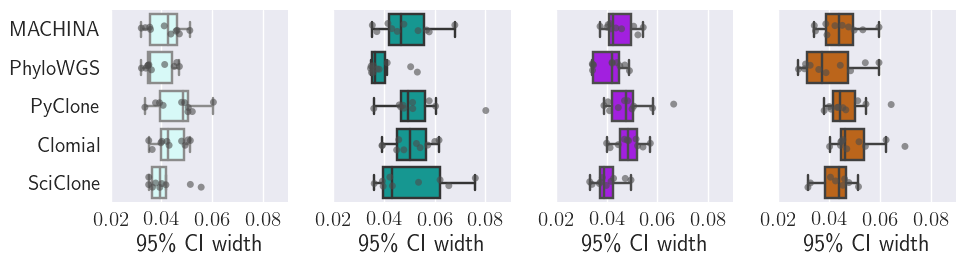

In [14]:
boxplots_row_width(df_width_mean, 'width_m5_row.pdf', 'width', '95\% CI width', 0.02, 0.09, 0.02)

In [15]:
df_width_clusters = (df_width.groupby(["method", "pattern", "instance"])['character'].max() + 1).to_frame('character').reset_index(['method','pattern', 'instance'])
df_width_clusters.rename(index=str, columns={"character": "clusters"}, inplace=True)
df_width_clusters['method'].replace(['TRUE'], ['Truth'], inplace=True)
df_width_clusters.head()

,method,pattern,instance,clusters
0,Clomial,mS,0,10
1,Clomial,mS,2,4
2,Clomial,mS,3,9
3,Clomial,mS,4,7
4,Clomial,mS,5,6


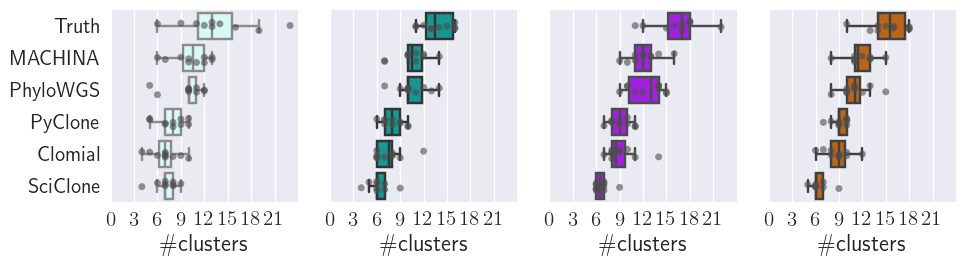

In [19]:
boxplots_row_width_true(df_width_clusters, 'clusters_m5_row.pdf', 'clusters', '\#clusters', 0, 24, 3)